In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1],[1, 1], [0, 0]]
X, y =datasets.make_blobs(n_samples= n_pts, random_state= 123, centers= centers, cluster_std= 0.4)

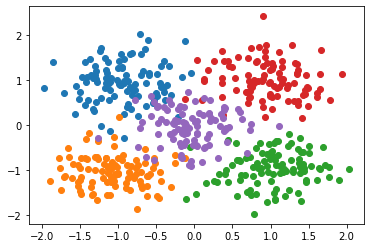

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])

In [4]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [5]:
model = Sequential()
model.add(Dense(5, input_shape= (2,), activation= 'softmax'))
model.compile(Adam(0.1), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x=X, y= y_cat, verbose=1, batch_size=50, epochs= 100)

Epoch 1/100
10/10 [==============================] - 2s 1ms/step - loss: 1.1365 - accuracy: 0.6249
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.8261
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3712 - accuracy: 0.9203
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.9457
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.9435
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.9385
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9399
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9257
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9556
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9477
Epoch 11/

In [7]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25)
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()  #change 2D to 1D
    grid = np.c_[xx_,yy_]
    grid_func = model.predict_classes(grid)
    z = grid_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

C:\Users\mahdi\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Enter x position :  0
Enter y position :  0


Prediction is :  4


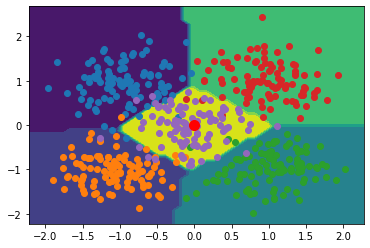

In [8]:
plot_decision_boundary(X,y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])


x = float(input('Enter x position : '))
y = float(input('Enter y position : '))
point = np.array([[x,y]])
predict = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize= 10, color='red')
print('Prediction is : ', predict[0])